### Live Trading com Dados

# Obtenção de dados financeiros com o Python
Parte 02

16/12/2021

Neste trecho, mostramos como trabalhar com as bibliotecas pandas_datareader e MetaTrader5 para a obtenção de dados financeiros.
Se você está buscando o código que contém as bibliotecas Quandl, investpy e yfinance (Parte 01), clique aqui: https://github.com/Trading-com-Dados/codigos_videos/blob/main/20211216_Live_Obten%C3%A7%C3%A3o_de_dados_financeiros_Parte_01.ipynb

## 1. pandas_datareader

Instalação da versão mais atualizada

In [8]:
!pip install -U pandas_datareader

Requirement already up-to-date: pandas_datareader in c:\programdata\anaconda3\lib\site-packages (0.10.0)


In [9]:
import pandas_datareader as pdr

In [14]:
mglu = pdr.data.DataReader('MGLU3.SA', 'yahoo', start = '2020-01-01')

In [15]:
mglu.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,12.3325,11.9275,12.075,12.3325,29600800.0,12.029736
2020-01-03,12.3325,12.0750,12.125,12.2225,26737600.0,11.922436
2020-01-06,12.3275,11.9500,12.100,12.2325,27359200.0,11.932189
2020-01-07,12.3000,12.1250,12.235,12.1975,26818800.0,11.898048
2020-01-08,12.5875,12.1250,12.155,12.5725,40007200.0,12.263844


<AxesSubplot:xlabel='Date'>

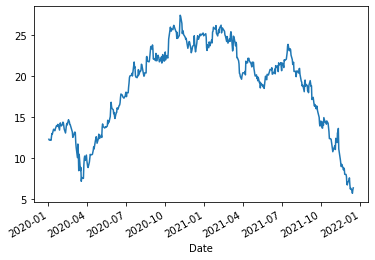

In [16]:
mglu.Close.plot()

In [18]:
mglu_actions = pdr.data.DataReader('MGLU3.SA', 'yahoo-actions', start = '2020-01-01')

In [19]:
mglu_actions

,action,value
2021-07-06,DIVIDEND,0.015494
2020-12-30,DIVIDEND,0.026301
2020-10-14,SPLIT,0.250000
2020-08-03,DIVIDEND,0.094176
2020-07-31,DIVIDEND,0.023541
2020-04-14,DIVIDEND,0.179508
2020-01-02,DIVIDEND,0.008947


## 2. MetaTrader5

In [1]:
!pip install MetaTrader5

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import pytz
import MetaTrader5 as mt5

In [20]:
mt5.initialize()

True

### 2.1. Explorando dados de mercado financeiro

Quantos ativos financeiros existem

In [21]:
mt5.symbols_total()

24500

Que ativos são esses?

In [ ]:
mt5.symbols_get()

In [ ]:
mt5.symbols_get('WEGE')

In [7]:
opcao_weg = mt5.symbols_get('WEGE')[0]._asdict()

In [8]:
opcao_weg['session_deals']

9621

In [9]:
mt5.symbol_info('WEGE3')

SymbolInfo(custom=False, chart_mode=1, select=True, visible=True, session_deals=9630, session_buy_orders=0, session_sell_orders=0, volume=1600, volumehigh=18000, volumelow=100, time=1639662714, digits=2, spread=1, spread_float=True, ticks_bookdepth=32, trade_calc_mode=32, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=2, filling_mode=3, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=35.63, bidhigh=36.27, bidlow=35.43, ask=35.64, askhigh=36.3, asklow=35.45, last=35.63, lasthigh=36.29, lastlow=35.43, volume_real=1600.0, volumehigh_real=18000.0, volumelow_real=100.0, option_strike=0.0, point=0.01, trade_tick_value=0.01, trade_tick_value_profit=0.01, trade_tick_value_loss=0.01, trade_tick_size=0.01, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=100.0, volume_max=419

In [10]:
mt5.symbol_info_tick('WEGE3')

Tick(time=1639662720, bid=35.63, ask=35.64, last=35.63, volume=1600, time_msc=1639662720064, flags=2, volume_real=1600.0)

In [12]:
mt5.symbol_info_tick('WEGE3')

Tick(time=1639662729, bid=35.63, ask=35.64, last=35.63, volume=100, time_msc=1639662729932, flags=0, volume_real=100.0)

#### Código para exibição das negociações do mini-índice em tempo real (delay de 0,5 segundos)

In [13]:
import time

t_end = time.time() + 15*1

while time.time() < t_end:
    
    x = mt5.symbol_info_tick('WING22')
    
    print (x)
    
    time.sleep(0.5)

Tick(time=1639662772, bid=109775.0, ask=109780.0, last=109780.0, volume=3, time_msc=1639662772863, flags=0, volume_real=3.0)
Tick(time=1639662773, bid=109775.0, ask=109780.0, last=109775.0, volume=6, time_msc=1639662773329, flags=0, volume_real=6.0)
Tick(time=1639662773, bid=109770.0, ask=109780.0, last=109770.0, volume=2, time_msc=1639662773905, flags=0, volume_real=2.0)
Tick(time=1639662774, bid=109770.0, ask=109775.0, last=109770.0, volume=20, time_msc=1639662774415, flags=0, volume_real=20.0)
Tick(time=1639662774, bid=109775.0, ask=109780.0, last=109775.0, volume=2, time_msc=1639662774887, flags=0, volume_real=2.0)
Tick(time=1639662775, bid=109770.0, ask=109775.0, last=109775.0, volume=1, time_msc=1639662775422, flags=0, volume_real=1.0)
Tick(time=1639662775, bid=109770.0, ask=109775.0, last=109780.0, volume=1, time_msc=1639662775903, flags=0, volume_real=1.0)
Tick(time=1639662776, bid=109775.0, ask=109780.0, last=109775.0, volume=10, time_msc=1639662776400, flags=0, volume_real=10

### 2.2. Dados de mini-índice e mini-dólar

In [14]:
mt5.symbols_get('WING22')

(SymbolInfo(custom=False, chart_mode=1, select=True, visible=True, session_deals=3721527, session_buy_orders=0, session_sell_orders=0, volume=4, volumehigh=7600, volumelow=1, time=1639662805, digits=0, spread=5, spread_float=True, ticks_bookdepth=32, trade_calc_mode=33, trade_mode=4, start_time=0, expiration_time=1645038900, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=2, filling_mode=3, order_mode=127, order_gtc_mode=2, option_mode=0, option_right=0, bid=109775.0, bidhigh=110530.0, bidlow=109205.0, ask=109780.0, askhigh=110535.0, asklow=109210.0, last=109780.0, lasthigh=110535.0, lastlow=109200.0, volume_real=4.0, volumehigh_real=7600.0, volumelow_real=1.0, option_strike=0.0, point=1.0, trade_tick_value=1.0, trade_tick_value_profit=1.0, trade_tick_value_loss=1.0, trade_tick_size=5.0, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_m

In [15]:
mt5.symbols_get('WDOG22')

(SymbolInfo(custom=False, chart_mode=1, select=False, visible=False, session_deals=0, session_buy_orders=0, session_sell_orders=0, volume=0, volumehigh=0, volumelow=0, time=0, digits=3, spread=0, spread_float=True, ticks_bookdepth=32, trade_calc_mode=33, trade_mode=4, start_time=0, expiration_time=1643656500, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=2, filling_mode=3, order_mode=127, order_gtc_mode=2, option_mode=0, option_right=0, bid=0.0, bidhigh=0.0, bidlow=0.0, ask=0.0, askhigh=0.0, asklow=0.0, last=0.0, lasthigh=0.0, lastlow=0.0, volume_real=0.0, volumehigh_real=0.0, volumelow_real=0.0, option_strike=0.0, point=0.001, trade_tick_value=5.0, trade_tick_value_profit=5.0, trade_tick_value_loss=5.0, trade_tick_size=0.5, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=1.0, volume_max=1500.0, volume_step=1.0, volume_limit=0.0, 

## 2.3. Obtendo dados de cotação de ativos

https://www.mql5.com/pt/docs/integration/python_metatrader5

#### 2.3.1. Função copy_rates_from

In [24]:
hoje = datetime.today()

In [25]:
acao = mt5.copy_rates_from("WING22", mt5.TIMEFRAME_M1, hoje, 100)

In [26]:
acao

array([(1639673160, 109440., 109445., 109340., 109345., 2646,  5, 34429),
       (1639673220, 109345., 109385., 109320., 109365., 2474,  5, 33540),
       (1639673280, 109365., 109395., 109350., 109380., 1410,  5, 19891),
       (1639673340, 109380., 109380., 109265., 109330., 3360,  5, 50132),
       (1639673400, 109330., 109395., 109270., 109335., 2985,  5, 42855),
       (1639673460, 109330., 109335., 109240., 109305., 2979,  5, 41785),
       (1639673520, 109305., 109315., 109245., 109300., 1891,  5, 28353),
       (1639673580, 109295., 109385., 109265., 109375., 2276,  5, 35772),
       (1639673640, 109380., 109380., 109210., 109220., 2855,  5, 45584),
       (1639673700, 109220., 109300., 109180., 109260., 3218,  5, 52656),
       (1639673760, 109265., 109345., 109255., 109320., 1773,  5, 22231),
       (1639673820, 109320., 109350., 109275., 109320., 1520,  5, 18488),
       (1639673880, 109320., 109415., 109300., 109375., 1965,  5, 25986),
       (1639673940, 109380., 109450., 

In [27]:
acao_df = pd.DataFrame(acao)

In [28]:
acao_df

,time,open,high,low,close,tick_volume,spread,real_volume
0,1639673160,109440.0,109445.0,109340.0,109345.0,2646,5,34429
1,1639673220,109345.0,109385.0,109320.0,109365.0,2474,5,33540
2,1639673280,109365.0,109395.0,109350.0,109380.0,1410,5,19891
3,1639673340,109380.0,109380.0,109265.0,109330.0,3360,5,50132
4,1639673400,109330.0,109395.0,109270.0,109335.0,2985,5,42855
...,...,...,...,...,...,...,...,...
95,1639678860,109935.0,109950.0,109875.0,109900.0,474,5,6250
96,1639678920,109900.0,109910.0,109865.0,109880.0,323,5,2868
97,1639678980,109880.0,109915.0,109850.0,109915.0,403,5,3411
98,1639679040,109910.0,109980.0,109880.0,109915.0,417,5,4372


In [29]:
acao_df['time'] = pd.to_datetime(acao_df['time'], unit = 's')

In [30]:
acao_df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,2021-12-16 16:46:00,109440.0,109445.0,109340.0,109345.0,2646,5,34429
1,2021-12-16 16:47:00,109345.0,109385.0,109320.0,109365.0,2474,5,33540
2,2021-12-16 16:48:00,109365.0,109395.0,109350.0,109380.0,1410,5,19891
3,2021-12-16 16:49:00,109380.0,109380.0,109265.0,109330.0,3360,5,50132
4,2021-12-16 16:50:00,109330.0,109395.0,109270.0,109335.0,2985,5,42855


In [31]:
acao_df.shape

(100, 8)

In [35]:
acao_df.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2021-12-16 18:21:00,2021-12-16 18:21:00,109935.0,109950.0,109875.0,109900.0,474,5,6250
2021-12-16 18:22:00,2021-12-16 18:22:00,109900.0,109910.0,109865.0,109880.0,323,5,2868
2021-12-16 18:23:00,2021-12-16 18:23:00,109880.0,109915.0,109850.0,109915.0,403,5,3411
2021-12-16 18:24:00,2021-12-16 18:24:00,109910.0,109980.0,109880.0,109915.0,417,5,4372
2021-12-16 18:31:00,2021-12-16 18:31:00,109965.0,109965.0,109965.0,109965.0,2,15,8068


In [34]:
acao_df.index = acao_df['time']

<AxesSubplot:xlabel='time'>

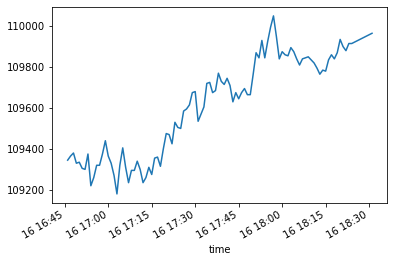

In [36]:
acao_df.close.plot()

<AxesSubplot:xlabel='time'>

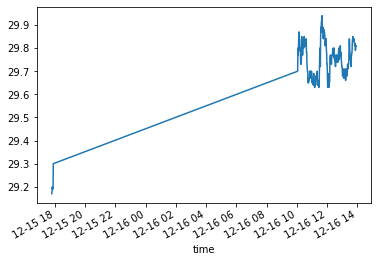

In [27]:
hoje = datetime.today()
acao = mt5.copy_rates_from("PETR4", mt5.TIMEFRAME_M1, hoje, 240)
acao_df = pd.DataFrame(acao)
acao_df['time'] = pd.to_datetime(acao_df['time'], unit = 's')
acao_df.index = acao_df['time']

acao_df.close.plot()

<AxesSubplot:xlabel='time'>

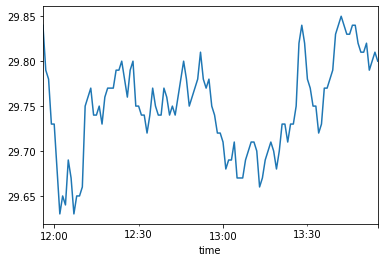

In [26]:
hoje = datetime.today()
acao = mt5.copy_rates_from("PETR4", mt5.TIMEFRAME_M1, hoje, 120)
acao_df = pd.DataFrame(acao)
acao_df['time'] = pd.to_datetime(acao_df['time'], unit = 's')
acao_df.index = acao_df['time']

acao_df.close.plot()

#### 2.3.2. Função copy_rates_from_pos

<AxesSubplot:xlabel='time'>

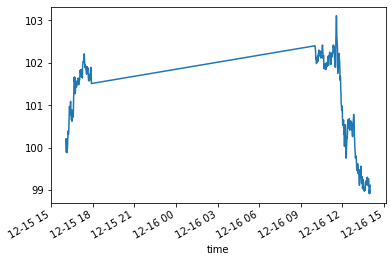

In [37]:
acao = mt5.copy_rates_from_pos("AAPL34", mt5.TIMEFRAME_M1, 10, 350)
acao_df = pd.DataFrame(acao)
acao_df['time'] = pd.to_datetime(acao_df['time'], unit = 's')
acao_df.index = acao_df['time']

acao_df.close.plot()

In [38]:
acao_df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2021-12-15 16:04:00,2021-12-15 16:04:00,99.87,99.91,99.80,99.90,18,1,8602
2021-12-15 16:05:00,2021-12-15 16:05:00,100.00,100.21,99.94,100.21,33,1,2610
2021-12-15 16:06:00,2021-12-15 16:06:00,100.25,100.30,100.14,100.14,14,1,381
2021-12-15 16:07:00,2021-12-15 16:07:00,100.12,100.12,99.92,99.98,6,1,84
2021-12-15 16:08:00,2021-12-15 16:08:00,100.07,100.07,99.88,99.88,5,1,9


In [39]:
acao_df.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2021-12-16 13:57:00,2021-12-16 13:57:00,98.98,99.00,98.91,99.00,6,4,7
2021-12-16 13:58:00,2021-12-16 13:58:00,98.98,98.98,98.87,98.91,10,1,229
2021-12-16 13:59:00,2021-12-16 13:59:00,98.94,98.97,98.93,98.94,4,4,4
2021-12-16 14:00:00,2021-12-16 14:00:00,99.00,99.07,98.96,99.07,3,5,14
2021-12-16 14:01:00,2021-12-16 14:01:00,99.08,99.11,99.01,99.11,4,5,10


<AxesSubplot:xlabel='time'>

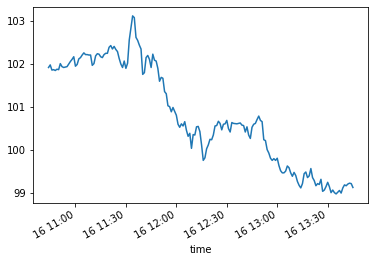

In [32]:
acao = mt5.copy_rates_from_pos("AAPL34", mt5.TIMEFRAME_M1, 10, 180)
acao_df = pd.DataFrame(acao)
acao_df['time'] = pd.to_datetime(acao_df['time'], unit = 's')
acao_df.index = acao_df['time']

acao_df.close.plot()

#### 2.3.3. Função copy_rates_range

In [33]:
fuso = pytz.timezone("Etc/GMT-3")

In [45]:
inicio = datetime(2021, 1, 1, hour = 10, tzinfo = fuso)
fim = datetime(2021, 12, 30, hour = 17, tzinfo = fuso)

In [46]:
acao = mt5.copy_rates_range("WEGE3", mt5.TIMEFRAME_D1, inicio, fim)

<AxesSubplot:xlabel='time'>

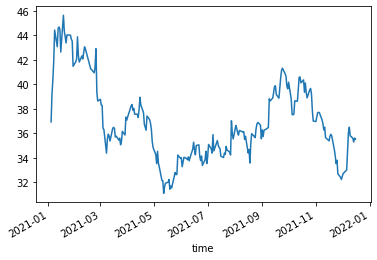

In [48]:
acao_df = pd.DataFrame(acao)
acao_df['time'] = pd.to_datetime(acao_df['time'], unit = 's')
acao_df.index = acao_df['time']

acao_df.close.plot()

#### Exemplo Petrobras intraday

In [40]:
inicio = datetime(2021, 12, 16, hour = 9, tzinfo = fuso)
fim = datetime(2021, 12, 16, hour = 18, tzinfo = fuso)

NameError: name 'fuso' is not defined

In [50]:
acao = mt5.copy_rates_range("WEGE3", mt5.TIMEFRAME_M1, inicio, fim)

<AxesSubplot:xlabel='time'>

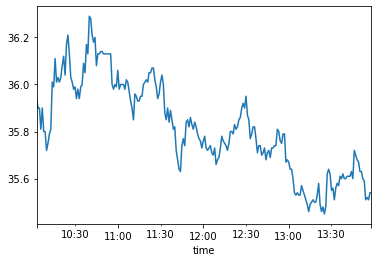

In [51]:
acao_df = pd.DataFrame(acao)
acao_df['time'] = pd.to_datetime(acao_df['time'], unit = 's')
acao_df.index = acao_df['time']

acao_df.close.plot()

### Estrutura para exibir o preço atualizado em tempo real

In [53]:
import sys

In [54]:
while(True):
    ativo = mt5.symbol_info_tick("WING22")
    print("\r" + str(ativo.last))
    sys.stdout.flush()
    
    time.sleep(0.5)

109875.0
109875.0
109880.0
109875.0
109875.0
109870.0
109870.0
109875.0
109875.0
109875.0
109870.0
109870.0
109860.0
109865.0
109870.0
109870.0
109875.0
109870.0
109870.0
109865.0
109865.0
109865.0


KeyboardInterrupt: 

In [55]:
ativo.last

109865.0

#### Ticks de mini-índice

In [77]:
inicio = datetime(2021, 12, 16, hour = 7)

In [48]:
dados = mt5.copy_ticks_from("WING22",inicio,50000000, mt5.COPY_TICKS_ALL)

In [49]:
dados

array([(1639648800, 109980., 109985., 109980.,   98, 1639648800001, 344, 9.800e+01),
       (1639648800, 109980., 109985., 109980.,    3, 1639648800008, 344, 3.000e+00),
       (1639648800, 109980., 109985., 109985.,    1, 1639648800010, 312, 1.000e+00),
       ...,
       (1639679479, 109950., 109965., 109965., 7942, 1639679479511,  56, 7.942e+03),
       (1639683000,      0.,      0., 109965., 7942, 1639683000021,   6, 7.942e+03),
       (1639688414,      0.,      0., 109965., 7942, 1639688414000,   6, 7.942e+03)],
      dtype=[('time', '<i8'), ('bid', '<f8'), ('ask', '<f8'), ('last', '<f8'), ('volume', '<u8'), ('time_msc', '<i8'), ('flags', '<u4'), ('volume_real', '<f8')])

In [50]:
# a partir dos dados recebidos criamos o DataFrame
dados_frame = pd.DataFrame(dados)

In [51]:
dados_frame.head()

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,1639648800,109980.0,109985.0,109980.0,98,1639648800001,344,98.0
1,1639648800,109980.0,109985.0,109980.0,3,1639648800008,344,3.0
2,1639648800,109980.0,109985.0,109985.0,1,1639648800010,312,1.0
3,1639648800,109980.0,109985.0,109985.0,4,1639648800011,312,4.0
4,1639648800,109980.0,109985.0,109980.0,2,1639648800022,344,2.0


In [52]:
# convertemos o tempo em segundos no formato datetime
dados_frame['time']=pd.to_datetime(dados_frame['time'], unit='s')

<AxesSubplot:xlabel='time'>

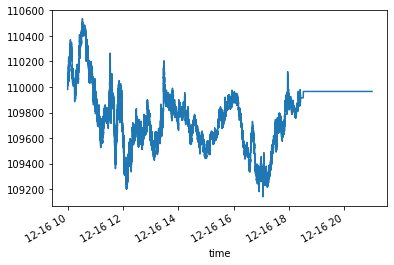

In [53]:
dados_frame.index = dados_frame['time']
dados_frame['last'].plot()

In [54]:
dados_frame.shape

(1248320, 8)